In [4]:
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df=pd.read_csv('kyphosis.csv')

In [9]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


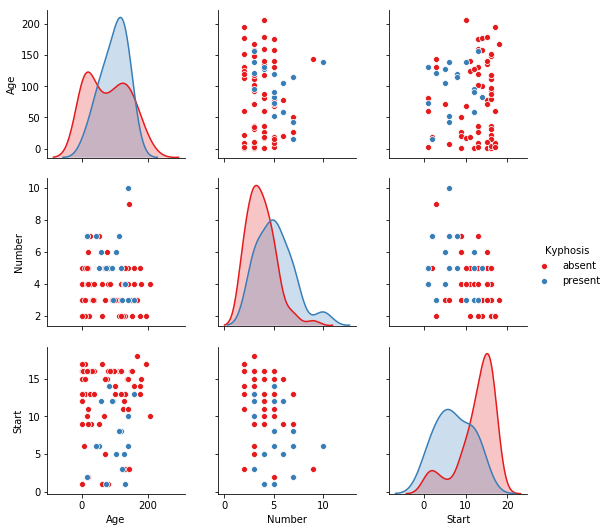

In [10]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [13]:
from sklearn.model_selection import train_test_split
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree=DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
predictions=dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

   micro avg       0.84      0.84      0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [24]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 2  3]]


In [27]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [28]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

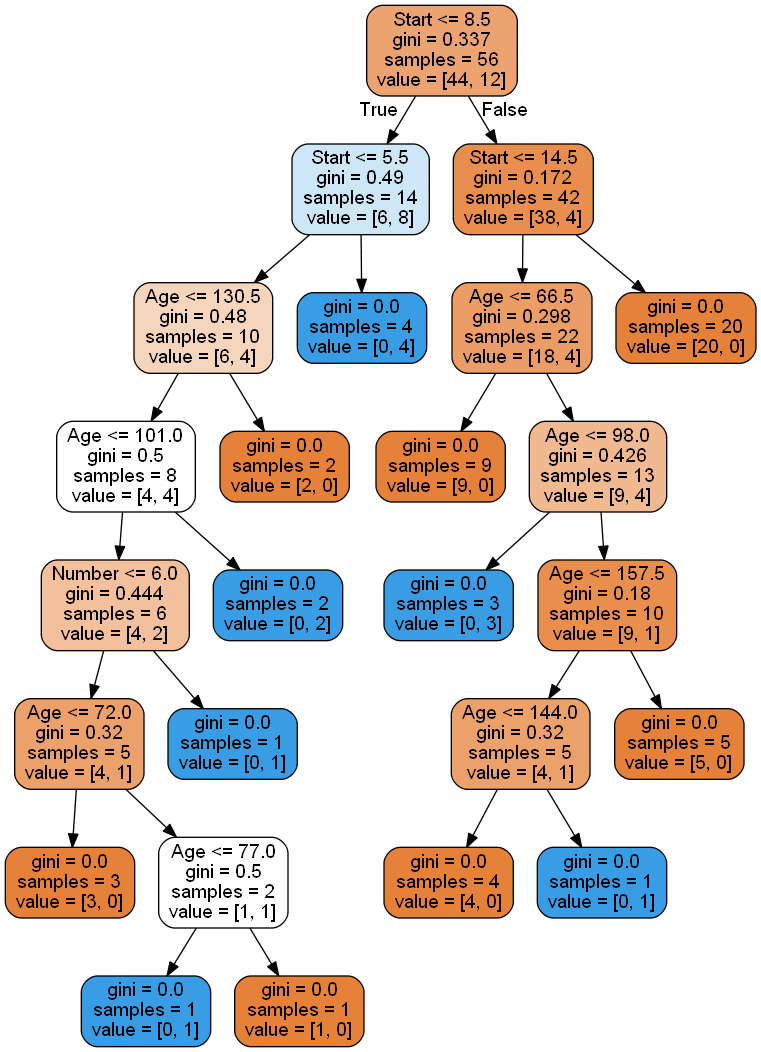

In [36]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [37]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\graphviz-2.38\release\bin'

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_pred=rfc.predict(X_test)


In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 1  4]]


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      1.00      0.98        20
     present       1.00      0.80      0.89         5

   micro avg       0.96      0.96      0.96        25
   macro avg       0.98      0.90      0.93        25
weighted avg       0.96      0.96      0.96        25

